In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

In [12]:
x,y=make_blobs(n_samples=300,centers=4)
df= pd.DataFrame(x,columns=['Feature_1','Feature_2'])
df

,Feature_1,Feature_2
0,-5.965008,6.089282
1,7.295581,1.008614
2,9.392219,1.228079
3,0.277802,-5.331428
4,-9.339702,-6.107822
...,...,...
295,-9.458581,-8.670898
296,8.356265,0.730502
297,7.560484,1.663501
298,0.322803,-7.693486


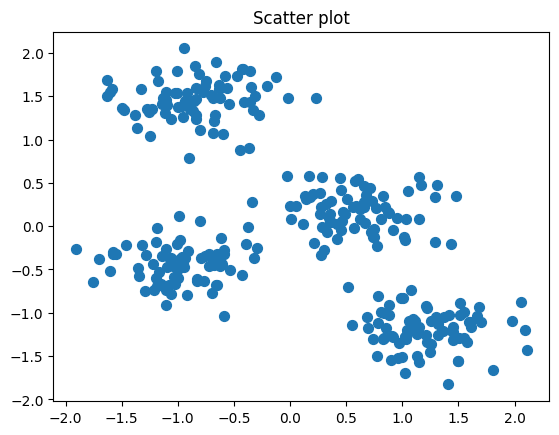

In [13]:
plt.scatter(X[:,0],X[:,1],s=50)
plt.title('Scatter plot')
plt.show()

In [7]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(X)


KMeans(n_clusters=4, random_state=42)

In [8]:
y_kmeans= kmeans.predict(X)

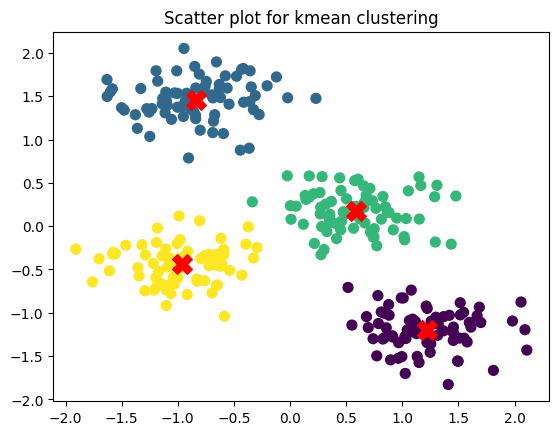

In [10]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50)
centers= kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,marker='X')
plt.title('Scatter plot for kmean clustering')
plt.show()

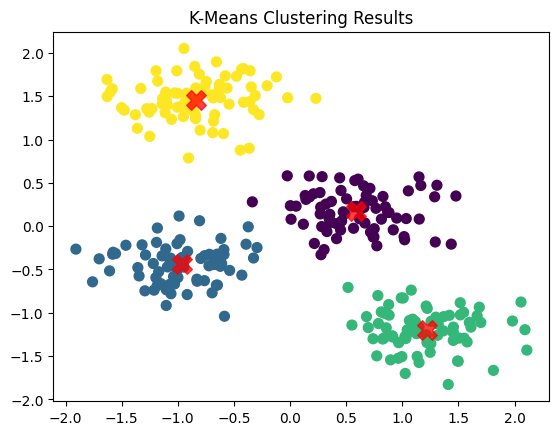

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering Results')
plt.show()

## Elbow Method

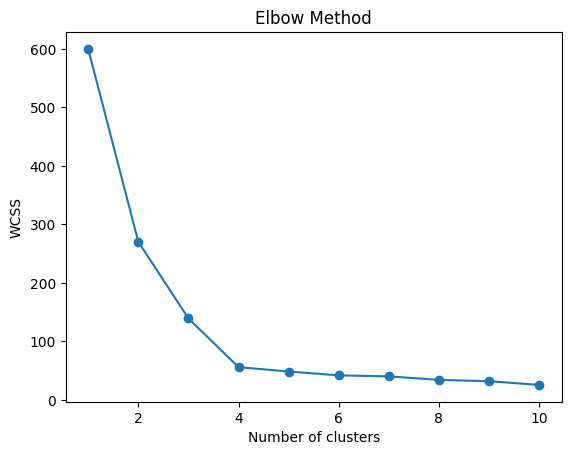

In [15]:
wcss = []   # within clusters sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Hierarchical clustering
**Agglomerative (bottom-up)**: each point starts as its own cluster, then pairs of clusters are merged.

**Divisive (top-down)**: all points start in one cluster and are recursively split.

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

A **dendrogram** is a tree-like diagram that visualizes how data points or clusters are merged in hierarchical clustering.

The **linkage function** defines how distances between clusters are calculated during the merging process.


**Ward** Minimizes the total variance within clusters (uses Euclidean distance). Best for compact, spherical clusters.

In [19]:
linked=linkage(X,'ward')

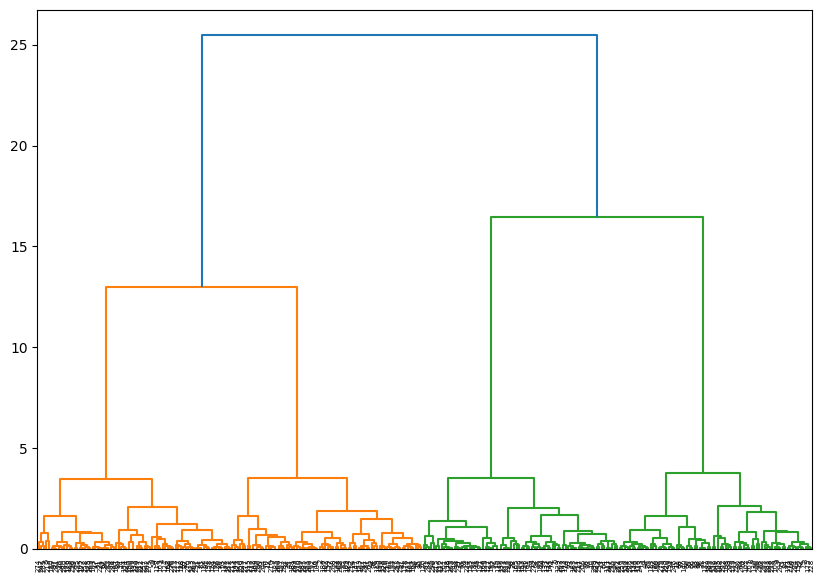

In [21]:
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.show()

In [ ]:
Look at the longest vertical lines (branches) that are not crossed by any other horizontal line.
Draw a horizontal cut (line) across the dendrogram just before these longest vertical merges.
Count how many vertical lines your horizontal cut crosses → That’s your number of clusters.